# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
sinasc = pd.read_csv('SINASC_RO_2019.csv')

In [23]:
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [31]:
sinasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

#### 2. Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE. <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

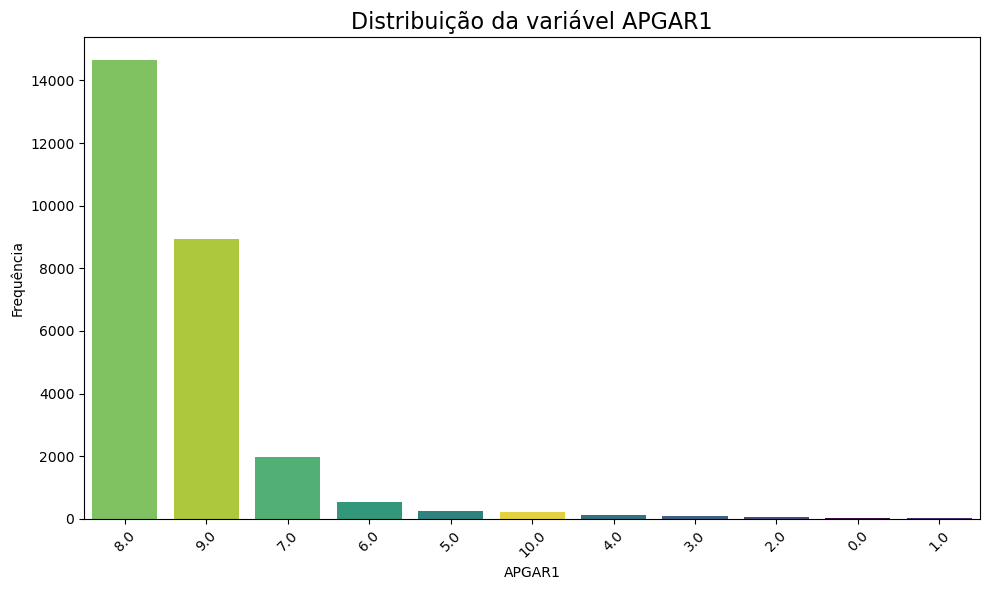

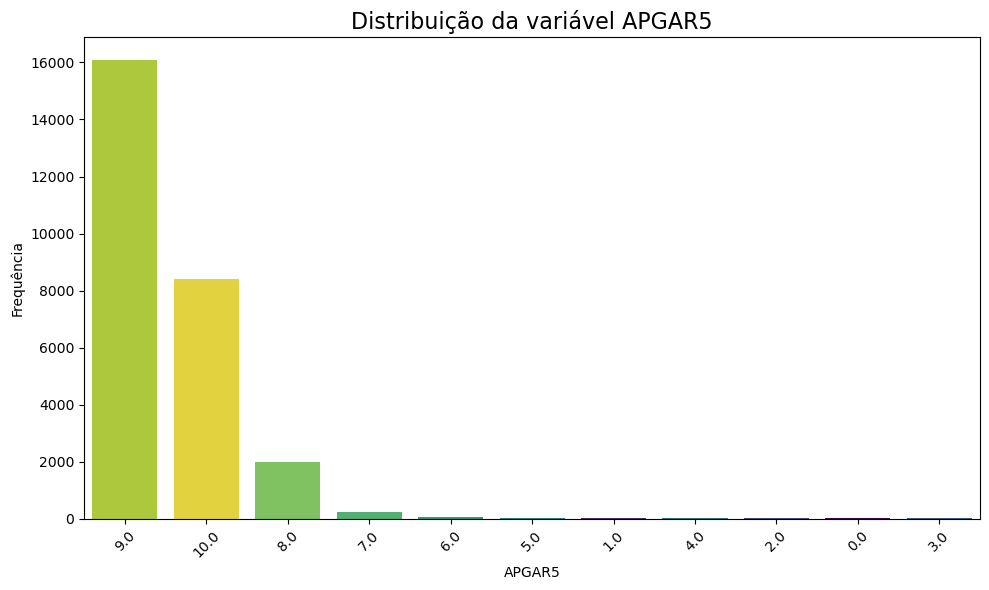

In [26]:
plot_bar(sinasc, 'APGAR5')


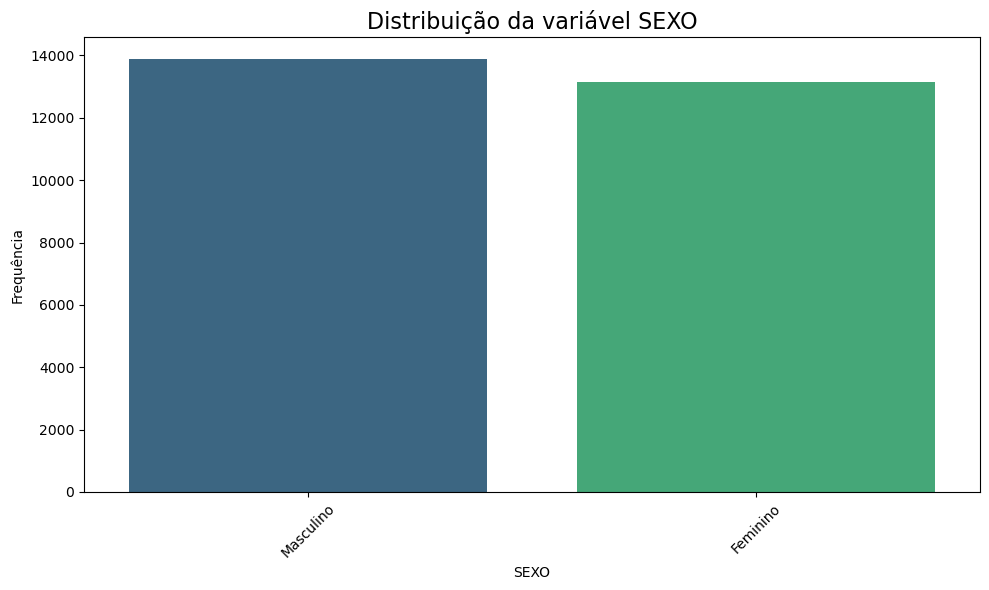

In [27]:
plot_bar(sinasc, 'SEXO')


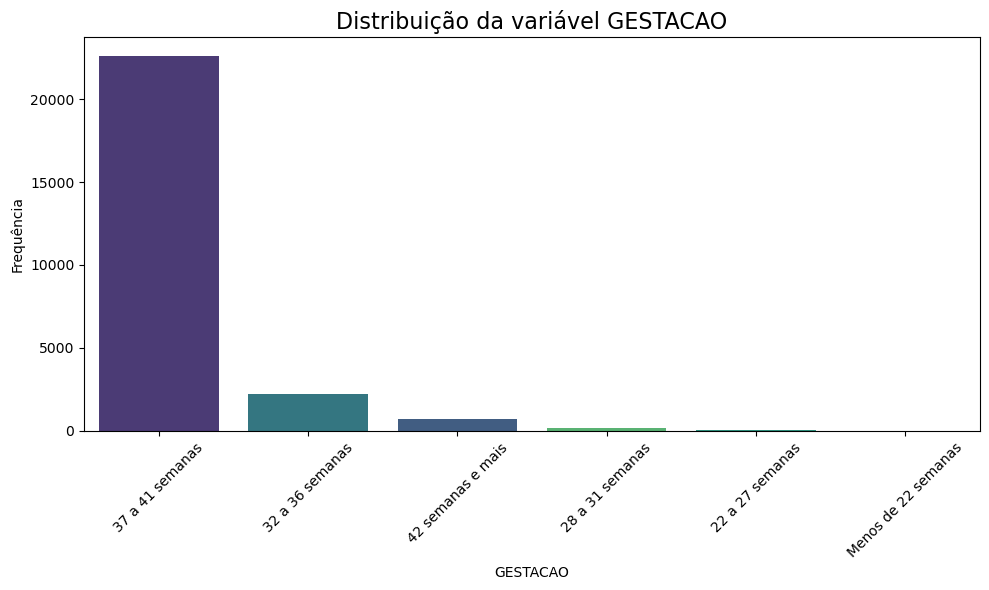

In [28]:
plot_bar(sinasc, 'GESTACAO')

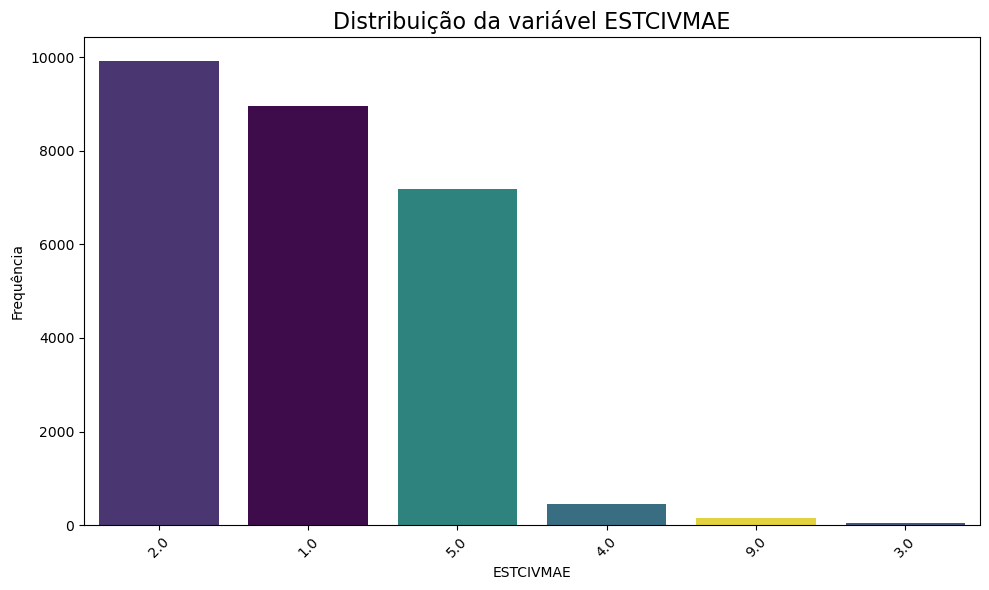

In [29]:
plot_bar(sinasc, 'ESTCIVMAE')

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

In [18]:
media_apgar5_por_consultas = sinasc.groupby('CONSULTAS')['APGAR5'].mean().reset_index()


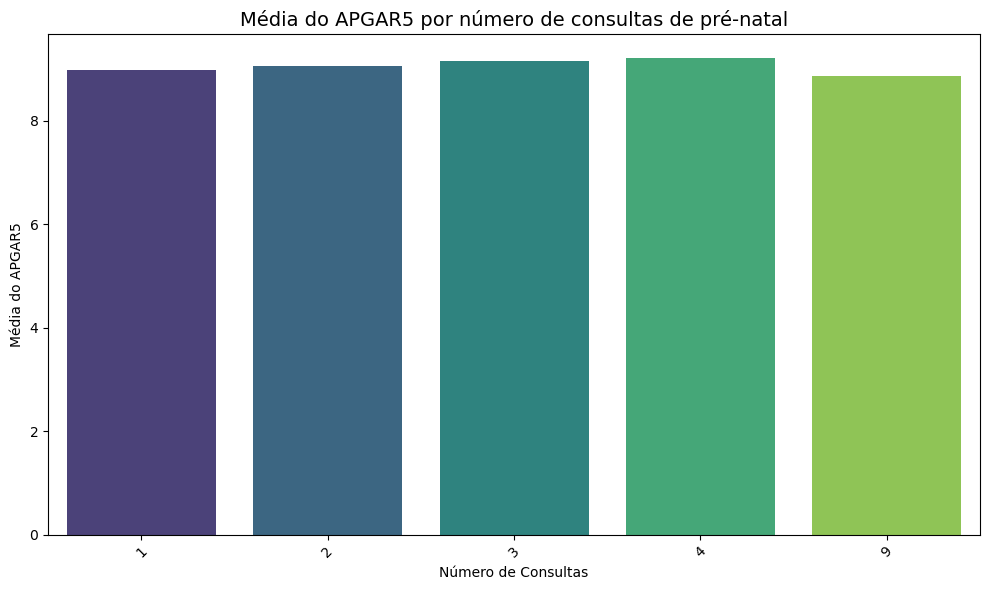

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=media_apgar5_por_consultas, x='CONSULTAS', y='APGAR5', palette='viridis')
plt.title('Média do APGAR5 por número de consultas de pré-natal', fontsize=14)
plt.xlabel('Número de Consultas')
plt.ylabel('Média do APGAR5')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

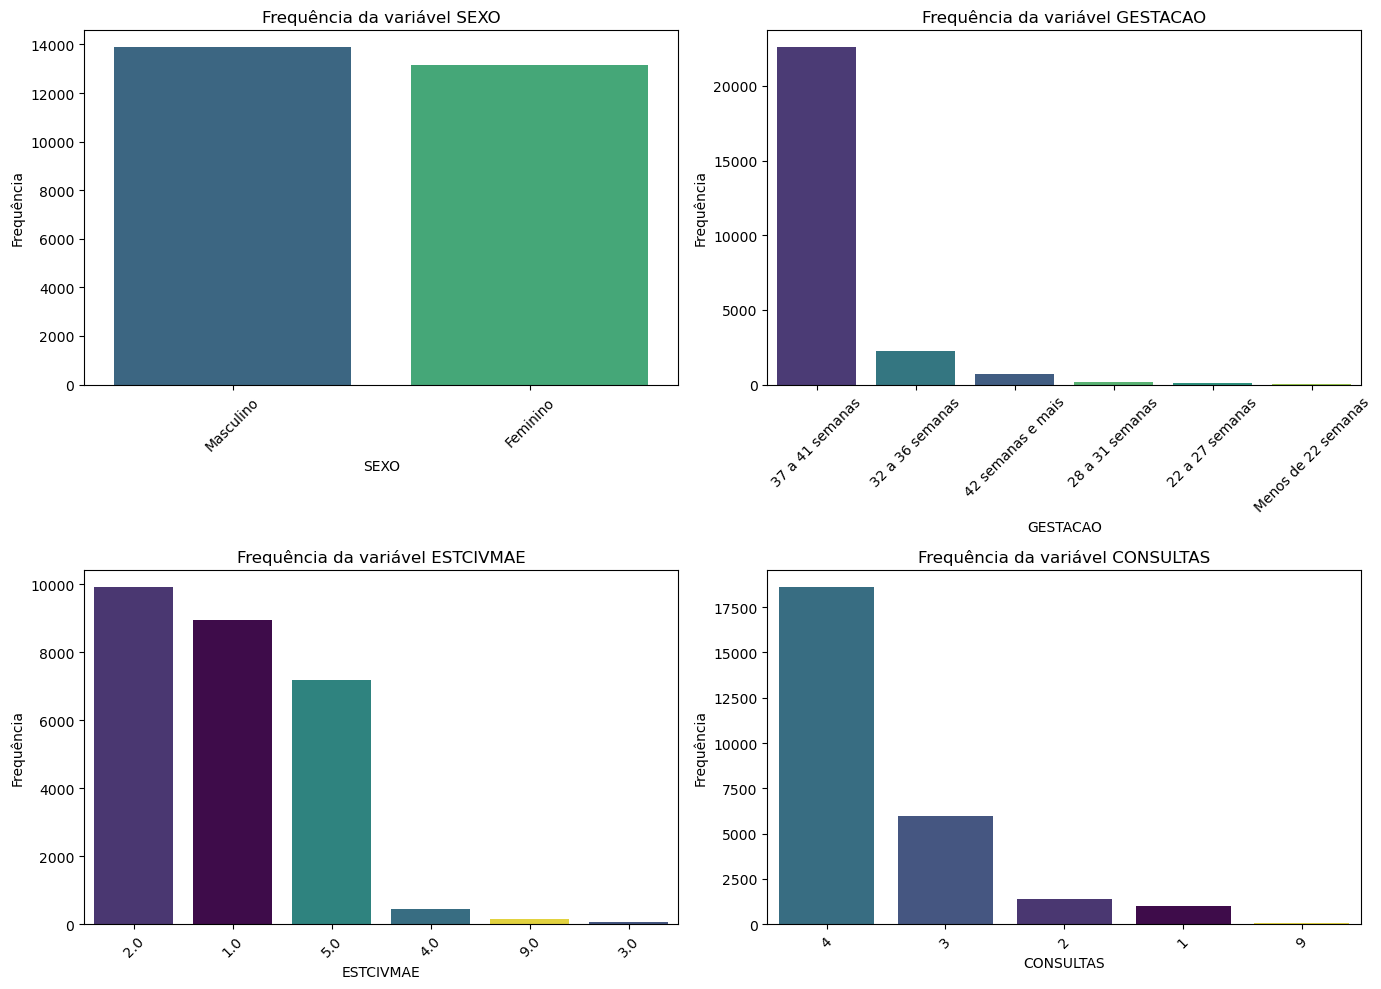

In [20]:
# Lista das variáveis que vamos visualizar
variaveis = ['SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']

# Define a figura com 2 linhas e 2 colunas (4 gráficos no total)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axs = axs.flatten()  # Deixa os eixos em um único vetor para facilitar o loop

# Cria um gráfico de barras para cada variável
for i, var in enumerate(variaveis):
    sns.countplot(
        data=sinasc,
        x=var,
        hue=var,
        order=sinasc[var].value_counts().index,
        palette='viridis',
        legend=False,
        ax=axs[i]
    )
    axs[i].set_title(f'Frequência da variável {var}', fontsize=12)
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequência')
    axs[i].tick_params(axis='x', rotation=45)

# Ajusta os espaços entre os gráficos
plt.tight_layout()
plt.show()